# Definicion del operador RB

In [128]:

# Definimos una funcion para calcular el valor de la reduccion a la base 10

def RB(n:int):
    while n > 9:
        n = sum(int(d) for d in str(n))

    return n

print(RB(12))
print(RB(123))

3
6


# Definicion de las sucesiones a explorar

In [140]:
import operator
from functools import reduce

def n_producto(n:int):
    """
    Función que toma un número entero n y devuelve la suma de los dígitos del producto de los dígitos del número n.
    
    Params:
        n:int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.

    Return:
        suma de los dígitos del producto de los dígitos del número n.
    """
    # Convertir el número en una lista de dígitos
    digits = list(map(int, str(n)))
    # Calcular el producto de los dígitos
    product = reduce(operator.mul, digits)
    # Convertir el producto en una lista de dígitos
    product_digits = list(map(int, str(product)))
    
    # Devolver la suma de los dígitos del producto
    a_n = sum(product_digits)
    return RB(a_n)

def n_cifras_cuadrado(n:int):
    """
    Función que toma un número entero n lo eleva al cuadrado y devuelve la suma de los dígitos del número n.
    
    Params:
        n:int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.

    Return:
        suma de los dígitos del número n.
    """
    # Convertir el número en una lista de dígitos
    digits = list(map(int, str(n)))

    # Elevar cada dígito al cuadrado
    digits = [d**2 for d in digits]
    
    # Devolver la suma de los dígitos del producto
    a_n = sum(digits)
    return RB(a_n)

def n_primo(n: int):
    """
    Función que toma un número entero n y devuelve el n-ésimo número primo. aplica el operador de reducción a la base 10.

    Params:
        n: int, entero del cual se calculará el n-ésimo número primo.

    Return:
        n-ésimo número primo con reducción a la base 10.
    """

    if n == 1:
        return 2
    if n == 2:
        return 3
    if n == 3:
        return 5
    if n == 4:
        return 7
    if n == 5:
        return 2 # 11
    if n == 6:
        return 4 # 13   

    primes = [2, 3, 5, 7, 11, 13]  # los primeros 6 primos
    num = 14  # siguiente número a evaluar
    prime_count = 6  # contador de números primos encontrados

    while prime_count < n:
        for p in primes:
            if num % p == 0:
                break
        else:
            prime_count += 1
            if prime_count == n:
                return RB(num)
        num += 1




In [96]:
# Testeamos la función de los primos

for i in range(1, 10):
    print("n_primo(" + str(i) + ") ->", n_primo(i), end=", ")

n_primo(1) -> 2, n_primo(2) -> 3, n_primo(3) -> 5, n_primo(4) -> 7, n_primo(5) -> 11, n_primo(6) -> 13, n_primo(7) -> 17, n_primo(8) -> 19, n_primo(9) -> 23, 

Optimizacion de la de los numeros primos:

## Definir una funcion para calcular los n primeros de una sucesion

In [25]:
def an_k(a, n, k):
    """
    Funcion que toma un número entero n y un número entero k y devuelve una lista con los k primeros números de la sucesión.

    Params:
        n:int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        k:int, entero que indica la cantidad de números de la sucesión que se devolverán.
        
    Return:
        lista con los k primeros números de la sucesión.
    """
    
    k_list = []

    for i in range(1, k+1):
        
        an = a(n+i)
        k_list.append(an)
        
    return k_list


# Crear los clusters de slices

In [26]:

def build_cluster(a, n_i, w, h):
    """
    Funcion que toma un número entero n_i, un ancho w y un alto h y devuelve una lista de listas con los números de la sucesión.

    Params:
        a:función, función que calcula los números de la sucesión.
        n_i:int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        w:int, ancho
        h:int, alto

    Return:
        lista de listas con los números de la sucesión.

    """ 

    data_list = []
    for i in range(h):
        k_list = an_k(a, n_i, w)
        data_list.append(k_list)
        n_i += w

    return data_list


   

Probamos la funcion:


- Creamos un cluster de 10x10

In [30]:
# Configuracion de la sucesion
# --------------------------------

n_0 = 0                 # Termino inicial de la sucesion
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# --------------------------------

build_cluster(n_producto, n_0, w, h)

[[1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
 [2, 4, 6, 8, 1, 3, 5, 7, 9, 0],
 [3, 6, 9, 3, 6, 9, 3, 6, 9, 0],
 [4, 8, 3, 7, 2, 6, 1, 5, 9, 0],
 [5, 1, 6, 2, 7, 3, 8, 4, 9, 0],
 [6, 3, 9, 6, 3, 9, 6, 3, 9, 0],
 [7, 5, 3, 1, 8, 6, 4, 2, 9, 0],
 [8, 7, 6, 5, 4, 3, 2, 1, 9, 0],
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 0]]

Una vez visto como podemos crear clusters, podemos crear una matiz de clusters, considerando cada cluster un elemento, de esta forma:

- Una matriz de clusters de 10x10 estara compuesta por 100 clusters


<p><span style="color: #00ff00;"><strong>La visualizacion en matriz de clusters, nos da indicio de que existe cierta simetria para algunas sucesiones cuando aplicamos el operador RB (Reduccion a la Base)</strong> </span></p>

Para facilitar el proceso de visualizacion, se procede a codificar con un color cada valor posible (0-9).

La implementacion de esta funcionalidad esta basada en crear una lista de clusters del tamaño equivalente a la dimension de matriz deseada (h*w)

Cada cluster de la lista se codificara en una imagen de las mismas dimensiones que la matriz, y los clusters se iran concatenando en la imagen de izquierda a derecha y de arriba a abajo. (Notese que esto es experimental y no es ninguna regla, se podria implementar multiples variaciones, lo que daria lugar a simetrias con distinto eje, pero simetrias igualmente)

In [79]:
def build_cluster_list(a, n_0: int, w: int, h: int, count: int, offset:int) -> list[list[int]]:
    """
    Funcion que toma un número entero n_0, un número entero count y un número entero offset y devuelve una lista de listas de listas con los números de la sucesión.

    Params:
        n_0: int, entero del cual se calculará la suma de los dígitos del producto de los dígitos.
        count: int, cantidad de clusters
        offset: int, offset entre clusters

    Return:
        lista de listas de listas con los números de la sucesión.

    """ 

    clusters = []
    for i in range(count):

        data_list = build_cluster(a, n_0, w, h)
        clusters.append(data_list)
        n_0 += offset

    return clusters


Crear lista de 100 clusters:


- Como termino inicial de la sucesion, definimos n_0
- Como ancho de cluster w
- Como alto de cluster h



In [62]:
# Configuracion de la sucesion deseada
# --------------------------------

a = n_producto          # Funcion que calcula los numeros de la sucesion
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 10                # Ancho de la matriz de clusters
m_h = 10                # Alto de la matriz de clusters
offset = h*w            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = build_cluster_list(a, n_0, w, h, cluster_count, offset)

In [65]:
clusters[9]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [36]:
print("Numero de clusters: ", len(clusters))
print("Numero de filas por cluster: ", len(clusters[0]))
print("Numero de columnas por cluster: ", len(clusters[0][0]))

Numero de clusters:  100
Numero de filas por cluster:  10
Numero de columnas por cluster:  10


In [37]:
clusters[0]

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
 [2, 4, 6, 8, 1, 3, 5, 7, 9, 0],
 [3, 6, 9, 3, 6, 9, 3, 6, 9, 0],
 [4, 8, 3, 7, 2, 6, 1, 5, 9, 0],
 [5, 1, 6, 2, 7, 3, 8, 4, 9, 0],
 [6, 3, 9, 6, 3, 9, 6, 3, 9, 0],
 [7, 5, 3, 1, 8, 6, 4, 2, 9, 0],
 [8, 7, 6, 5, 4, 3, 2, 1, 9, 0],
 [9, 9, 9, 9, 9, 9, 9, 9, 9, 0]]

In [10]:
clusters[1]

[[5, 8, 4, 2, 2, 4, 8, 5, 4, 5],
 [6, 9, 5, 3, 3, 5, 9, 6, 5, 8],
 [9, 3, 8, 6, 6, 8, 3, 9, 8, 4],
 [5, 8, 4, 2, 2, 4, 8, 5, 4, 2],
 [3, 6, 2, 9, 9, 2, 6, 3, 2, 2],
 [3, 6, 2, 9, 9, 2, 6, 3, 2, 4],
 [5, 8, 4, 2, 2, 4, 8, 5, 4, 8],
 [9, 3, 8, 6, 6, 8, 3, 9, 8, 5],
 [6, 9, 5, 3, 3, 5, 9, 6, 5, 4],
 [5, 8, 4, 2, 2, 4, 8, 5, 4, 9]]

# Representar graficamente

In [11]:
# def number_to_color(number):
#     colors = {
        
#         0: (0, 0, 0),        # black
#         1: (255, 0, 0),      # red
#         2: (255, 0, 100),    # orange
#         3: (255, 100, 100),  # yellow
#         4: (0, 255, 0),      # green
#         5: (0, 255, 100),    # lime
#         6: (100, 255, 100),  # turquoise
#         7: (0, 0, 255),      # blue
#         8: (0, 100, 255),    # purple
#         9: (100, 100, 255)   # cyan

#     }
#     return colors[number]


def number_to_gray(number):
    gray = int((255/9) * number)
    return (gray, gray, gray)


def number_to_color(number):
    colors = {
        1: (255, 0, 0),      # red
        2: (255, 128, 0),    # orange
        3: (255, 255, 0),    # yellow
        4: (0, 255, 0),      # green
        5: (0, 255, 255),    # cyan
        6: (0, 0, 255),      # blue
        7: (128, 0, 255),    # purple
        8: (255, 0, 255),    # magenta
        9: (255, 255, 255),  # white
        0: (0, 0, 0)         # black
    }
    return colors[number]



In [12]:
!pip install Pillow

Defaulting to user installation because normal site-packages is not writeable


In [81]:
from PIL import Image
from IPython.display import display

def create_image(data, dimensions, scale=1, paint_function=number_to_color):
    width, height = dimensions
    image = Image.new('RGB', (width*scale, height*scale), (255, 255, 255))
    pixels = image.load()
    for i, row in enumerate(data):
        for j, number in enumerate(row):
            color = paint_function(number)
            for x in range(scale):
                for y in range(scale):
                    pixels[j*scale+x, i*scale+y] = color
    return image

### Ejemplo de funcionamiento

Dimensions: (10, 10)


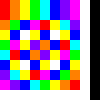

In [82]:
w = len(clusters[0][0])
h = len(clusters[0])

dim = (w, h)
print("Dimensions:", dim)

image = create_image(clusters[0], dim, scale=10)
display(image)

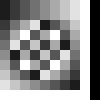

In [83]:
image = create_image(clusters[0], dim, scale=10, paint_function=number_to_gray)
display(image)

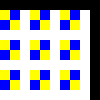

In [84]:
image = create_image(clusters[3], dim, scale=10)
display(image)

In [69]:
def build_cluster_matrix(clusters_wide, clusters_high, clusters):
    cluster_matrix = []
    for i in range(clusters_high):
        row = []
        for j in range(clusters_wide):
            row.append(clusters[i*clusters_wide + j])
        cluster_matrix.append(row)
    return cluster_matrix

In [70]:
# Creamos una imagen global a partir de la lista de sublistas de clusters
# ----------------------------------------------------------------------

def create_global_image(cluster_matrix, scale=1, paint_function=number_to_color):

    w = len(cluster_matrix[0][0][0])
    h = len(cluster_matrix[0][0])

    width = w * len(cluster_matrix[0])
    height = h * len(cluster_matrix)

    image = Image.new('RGB', (width*scale, height*scale), (255, 255, 255))
    pixels = image.load()

    for i, row in enumerate(cluster_matrix):
        for j, cluster in enumerate(row):
            for x, row in enumerate(cluster):
                for y, number in enumerate(row):
                    color = paint_function(number)
                    for a in range(scale):
                        for b in range(scale):
                            pixels[j*w*scale+y*scale+b, i*h*scale+x*scale+a] = color

    return image


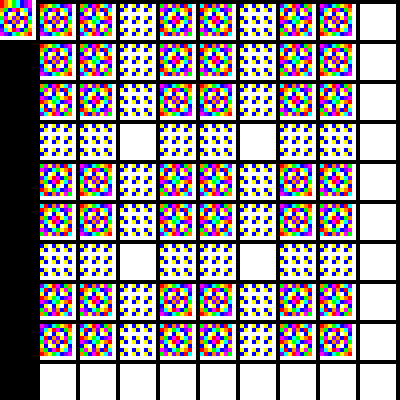

In [80]:
# Configuracion de la sucesion deseada
# --------------------------------

a = n_producto          # Funcion que calcula los numeros de la sucesion
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 10                # Ancho de la matriz de clusters
m_h = 10                # Alto de la matriz de clusters
offset = w*h            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = build_cluster_list(a, n_0, w, h, cluster_count, offset)

# Creamos la matriz de clusters
cluster_matrix = build_cluster_matrix(m_w, m_h, clusters)

# Imagen global
create_global_image(
    cluster_matrix, 
    scale=4,
    paint_function=number_to_color
)

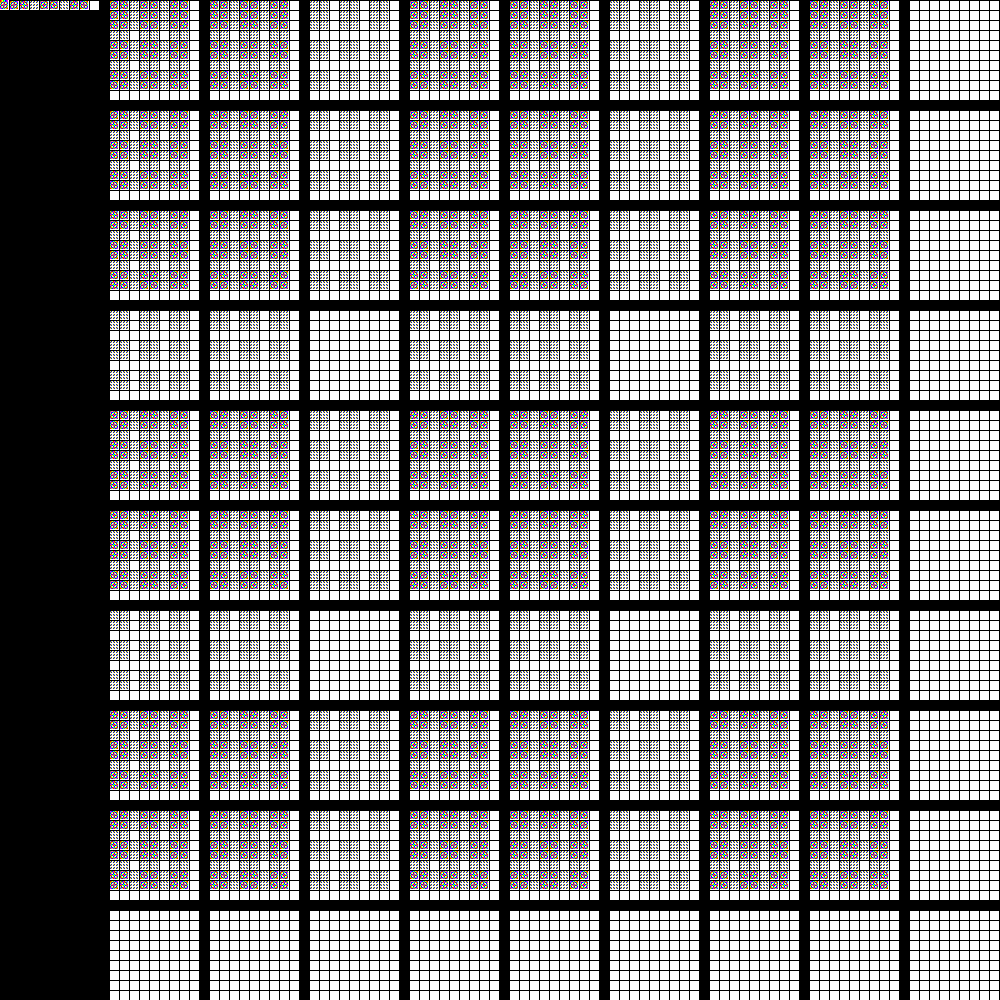

In [87]:
# Configuracion de la sucesion deseada
# --------------------------------

a = n_producto          # Funcion que calcula los numeros de la sucesion
n_0 = 0                 # Termino inicial de la sucesion

# Configuracion de los clusters
# --------------------------------
w = 10                  # Ancho del cluster
h = 10                  # Alto del cluster

# Configuracion de la matriz de clusters deseada
m_w = 100                # Ancho de la matriz de clusters
m_h = 100                # Alto de la matriz de clusters
offset = w*h            # Offset entre clusters (distancia entre clusters)

# Configuracion de la lista de clusters
# --------------------------------
cluster_count = m_w * m_h


# Obtenemos la lista de clusters
# --------------------------------
clusters = build_cluster_list(a, n_0, w, h, cluster_count, offset)

# Creamos la matriz de clusters
cluster_matrix = build_cluster_matrix(m_w, m_h, clusters)

# Imagen global
create_global_image(
    cluster_matrix, 
    scale=1,
    paint_function=number_to_color
)

Podemos facilitar este proceso mediante la implemntacion de ese codigo en una funcion:

In [117]:
def build_cluster_matrix_image(a, n_0, w, h, m_w, m_h, scale, paint_function):
    offset = w*h
    cluster_count = m_w * m_h
    clusters = build_cluster_list(a, n_0, w, h, cluster_count, offset)
    cluster_matrix = build_cluster_matrix(m_w, m_h, clusters)
    return create_global_image(cluster_matrix, scale, paint_function)


### Sucesion de n_producto

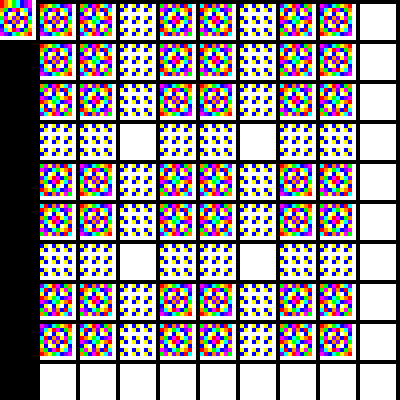

In [144]:
build_cluster_matrix_image(
    n_producto,     # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

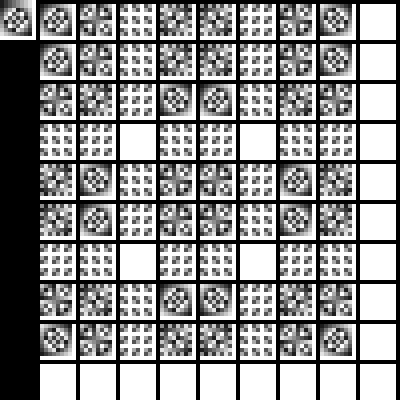

In [145]:
build_cluster_matrix_image(
    n_producto,     # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_gray # Funcion que asigna un color a cada numero
)

### Sucesion de n_cifras_cuadrado

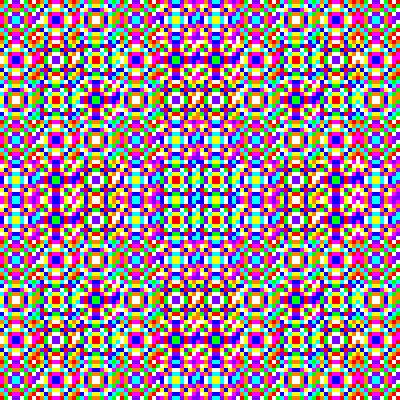

In [130]:
build_cluster_matrix_image(
    n_cifras_cuadrado,     # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,         # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

### Sucesion de n_primo

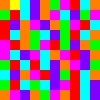

In [141]:
build_cluster_matrix_image(
    n_primo,      # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    1, 1,           # Ancho y alto de la matriz de clusters
    10,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

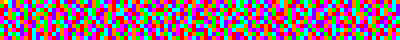

In [142]:
build_cluster_matrix_image(
    n_primo,      # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 1,           # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)

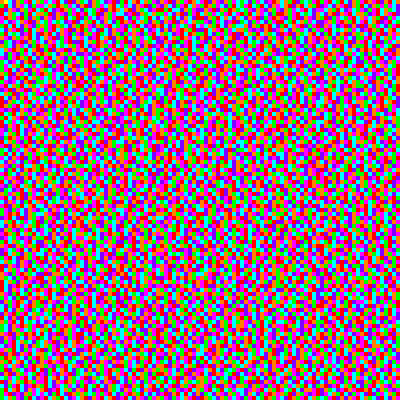

In [143]:
build_cluster_matrix_image(
    n_primo,      # Funcion que calcula los numeros de la sucesion
    0,              # Termino inicial de la sucesion
    10, 10,         # Ancho y alto del cluster
    10, 10,           # Ancho y alto de la matriz de clusters
    4,              # Escala de la imagen  4 = 1 pixel * 4 -> 1 pixel se expande en 4 pixeles
    number_to_color # Funcion que asigna un color a cada numero
)